Andre Londono
workshop 102

# Homework 3: Arrays and Plotting

** Submit this notebook to bourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_HW03.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Sunspots

[Adapted from Newman, Exercise 3.1] At <a href="http://www-personal.umich.edu/~mejn/computational-physics/sunspots.txt">this link</a> you will find a file called `sunspots.txt`, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot number.

a. Write a program that reads in the data and makes a graph of sunspots as a function of time. Adjust the $x$ axis so that the data fills the whole horizontal width of the graph.

b. Modify you program to display two subplots in a single figure: The plot from Part 1 with all the data, and a second subplot with the first 1000 data points on the graph.

c. Write a function `running_average(y, r)` that takes an array or list $y$ and calculates the running average of the data, defined by 
$$ Y_k = \frac{1}{2r+1} \sum_{m=-r}^r y_{k+m},$$
where $y_k$ are the sunspot numbers in our case. Use this function and modify your second subplot (the one with the first 1000 data points) to plot both the original data and the running average on the same graph, again over the range covered by the first 1000 data points. Use $r=5$, but make sure your program allows the user to easily change $r$.

The next two parts may require you to google for how to do things. Make a strong effort to do these parts on your own without asking for help. If you do ask for help from a GSI or friend, first ask them to point you to the resource they used, and do your best to learn the necessary techniques from that resource yourself. Finding and learning from online documentation and forums is a very important skill. (Hint: Stack Exchange/Stack Overflow is often a great resource.)

d. Add legends to each of your subplots, but make them partially transparent, so that you can still see any data that they might overlap. *Note: In your program, you should only have to change $r$ for the running average in one place to adjust both the graph and the legend.*

e. Since the $x$ and $y$ axes in both subplots have the same units, add shared $x$ and $y$ labels to your plot that are centered on the horizontal and vertical dimensions of your figure, respectively. Also add a single title to your figure.

When your are finished, your plot should look something close to this:

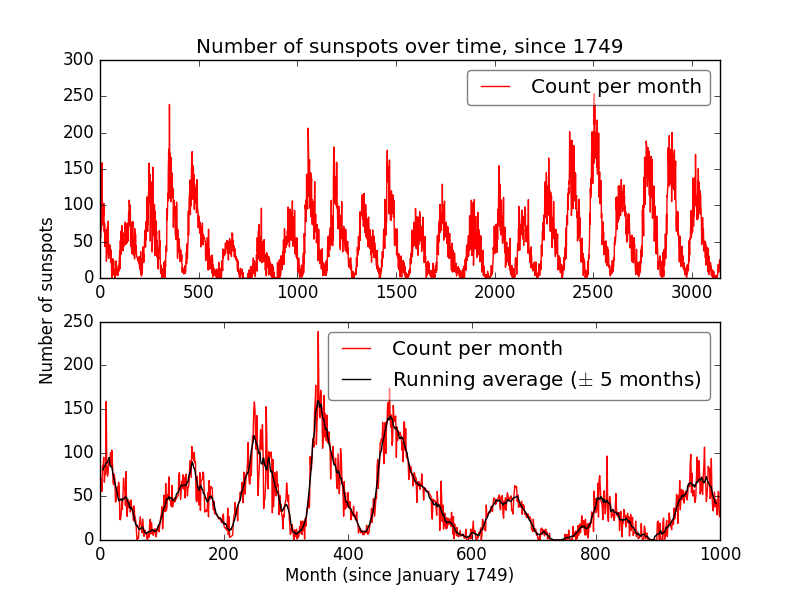

In [5]:
# Don't rerun this snippet of code.
# If you accidentally do, close and reopen the notebook (without saving)
# to get the image back. If all else fails, redownload the notebook.

# from IPython.display import Image
# Image(filename="samplecode/sunspots.png")

#### Hints

* The running average is not defined for the first and last few points that you're taking a running average over. (Why is that?) Notice, for instance, that the black curve in the plot above doesn't extend quite as far on either side as the red curve. For making your plot, it might be helpful if your `running_average` function returns an array of the $x$-values $x_k$ (or their corresponding indices $k$) along with an array of the $y$-values $Y_k$ that you compute for the running average.

* You can use the Latex code `$\pm$` for the $\pm$ symbol in the legend. You can also just write `+/-` if you prefer.


In [1]:
%pwd

u'/Users/andre/Desktop/Phys 77'

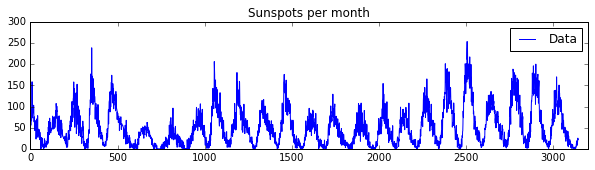

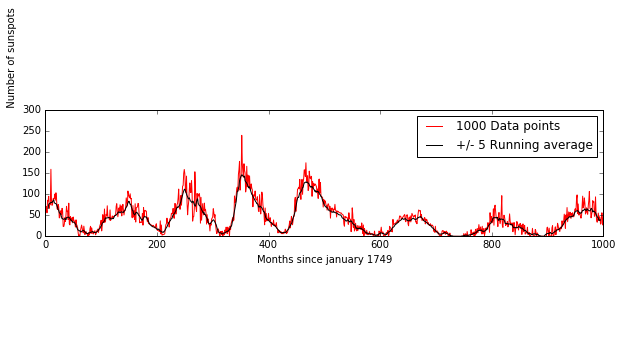

In [168]:
#The file contains two columns of numbers, the first being the month and the second being the sunspot number.
#a. Write a program that reads in the data and makes a graph of sunspots as a function of time. 
#Adjust the xx axis so that the data fills the whole horizontal width of the graph.
#what is the value smoothed out?
#average of the window in a region, as we move the region window has length r
#1/2r+1 points k is the midpoint
#forget about points at end of window

import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

def running_average(y, r):
    c = 1/(2.*r+1)
    ar1 = []
    for x in range(5 , 996):
        yk = c*(np.sum(y[x-r:x+r]))
        ar1.append(yk)
    return ar1


t, s = np.loadtxt('sunspots.txt', unpack = True)
plt.figure(figsize = [10,5])
plt.subplot(2, 1, 1)
plt.plot(t, s, label = "Data")
plt.title("Sunspots per month")
plt.legend(loc = 'upper right')
plt.xlim([0, 3200])


av = running_average(s, 5)
plt.figure(figsize =[10, 5])
plt.subplot(2, 1, 2)
plt.plot(t, s, "r", label = "1000 Data points")
plt.legend(loc = "upper right")
plt.plot(t[5:996], av, color='black', label = "+/- 5 Running average" )
plt.legend(loc = "upper right")
plt.xlim(0, 1000)
plt.xlabel("Months since january 1749")
plt.ylabel("                                                                          Number of sunspots")


plt.show()


# Problem 2: Variety Plot

In this problem, you will reproduce the following as a single figure with four subplots, as best you can:

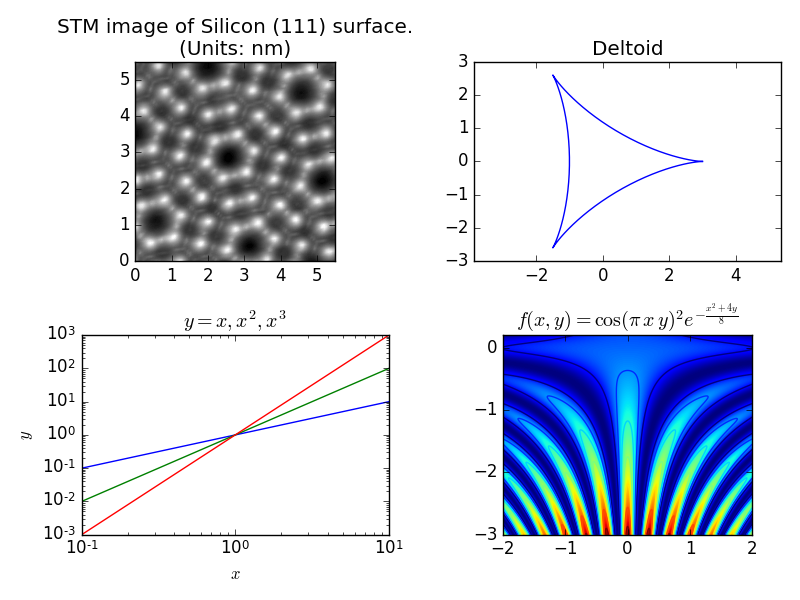

In [1]:
# Don't rerun this snippet of code.
# If you accidentally do, close and reopen the notebook (without saving)
# to get the image back. If all else fails, redownload the notebook.

# from IPython.display import Image
# Image(filename="samplecode/variety_plot.png")

Here are some hints and directions for each one:

**Upper-left:** This is an image of silicon taken with an electron microscope.

You can find the data file [here](http://www-personal.umich.edu/~mejn/computational-physics/stm.txt), among resources for the [Newman](http://www-personal.umich.edu/~mejn/computational-physics/) text.

You may assume that the upper-left of the array is indeed the upper-left of the image.

Both axes should run from 0 to 5.5.

This subplot uses the `gray` colormap.

**Upper-Right:** Matplotlib can plot any list of $(x,y)$ points you give it, including parametric or polar curves. The curve in this subplot is called a "deltoid", and is the result of the equations

$$ \begin{align*}
x &= 2\cos\theta + \cos2\theta \\
y &= 2\sin\theta - \sin2\theta
\end{align*} $$

over a range of $\theta$ from $0$ to $2\pi$.

To get the aspect ratio equal with nice spacing around the curve, try one of the following, depending on how you are making your subplots:
- if you're using `plt.subplot(...)` to get each subplot (the "state-machine" approach), add the `aspect='equal'` and `adjustable='datalim'` arguments to the deltoid subplot, so your command will look something like `plt.subplot(..., aspect='equal', adjustable='datalim')`.
- if you're using `... = plt.subplots(...)` (note the 's'!) or `ax = fig.add_subplot(...)` on a figure `fig` to get subplots with axes objects (the "object-oriented" approach), add the line `ax.set_aspect(aspect='equal', adjustable='datalim')`, where `ax` is the axes object you want to affect.

**Lower-Left:** This kind of plot is called a log-log plot, where both axes are on a logarithmic scale. Google or look in the matplotlib gallery to learn how to make this kind of plot.

The three curves are $y = x$, $y = x^2$, and $y = x^3$, where $x$ ranges over $10^{-1}$ to $10^1$. (Note: You can write powers of ten in python using the shorthand `1e-1` for $10^{-1}$, `1e1` for $10^1$, and so on.)

To make the pretty mathematical labels you see in the sample figure above, you can use
* `r'$y = x, x^2, x^3$'` for the title
* `r'$x$'` for the $x$-axis, and
* `r'$y$'` for the $y$-axis.

Just put these bits of code as you see them (with the **`r`** outside the quotes!) where you would normally put a string for the title or axes labels.

**Lower-Right:** Here you see a density plot with contours of the function

$$f(x,y) = \cos^2(\pi\,x\,y ) e^{-\frac{x^2 + 4 y}{8}},$$

over $x$ from -2 to 2 and $y$ from -3 to 0.2.

Use `meshgrid` to generate the $x$ and $y$ values. Be careful to make sure that the point $(-2,-3)$ is in the bottom left corner of the plot.

You'll need to use both `imshow` and `contour` to generate the density plot and then overlay it with contours. This plot uses the default contour spacing, so you don't need to worry about adjusting that. The colormap is `jet`, matplotlib's current default. (The default colormap will be changing to `viridis` in the next version.)

To get the ticks spaced out like you see here, use matplotlib's `xticks` or `set_xticks` functions for the $x$-axis (depending on how you're making your plots), and similar functions for the $y$-axis. You can pass each of these a single argument: a simple list or array of the numbers you want ticked on each axis.

**Spacing the subplots:** Once all is said and done and you run `plt.show()`, you may notice your plots are cramped and overlapping each other. Add the line `plt.tight_layout()` before `plt.show()`, and matplotlib will space things out in an attempt to avoid overlapping subplots.

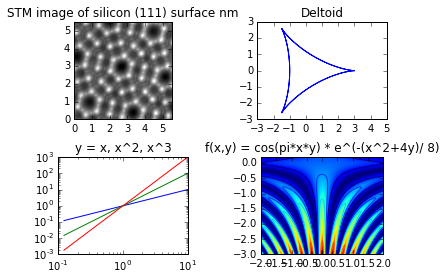

In [179]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


arr = []
arr = np.loadtxt('silicon.txt', unpack = 'true')
ax1.set_title("STM image of silicon (111) surface nm")
plt.set_cmap('gray')
ax1.imshow(arr , extent = [0,5.5 , 0, 5.5]) 


ax2.set_title("Deltoid")
theta = np.linspace(-2*np.pi, 2*np.pi, 100)  
x = 2*np.cos(theta) + np.cos(2*theta)
y = 2*np.sin(theta) - np.sin(2*theta)
ax2.plot(x, y, "b")
ax2.set_xbound(lower=-3, upper=5)



ax3.set_title( 'y = x, x^2, x^3')
x1 = np.linspace(-1/10,10)
ax3.loglog(x1, x1)
ax3.loglog(x1, x1**2)
ax3.loglog(x1, x1**3)



#ax4 = plt.gca()

x, y = np.meshgrid(np.arange(-2, 2, .01), np.arange(.2, -3, -.01))
#x, y = np.meshgrid(np.linspace(-2, 2, .01), np.linspace(.2, -3, -.01))
f = (np.cos(np.pi * x * y)**2) *np.exp(-(x**2+4*y) / 8)
ax4.set_title('f(x,y) = cos(pi*x*y) * e^(-(x^2+4y)/ 8)')
#ax4.set_title('$$f(x,y) = \cos^2(\pi\,x\,y ) e^{-\frac{x^2 + 4 y}{8}},$$')
ax4.set_xlim([-2, 2])
ax4.set_ylim([-3, .2])
plt.set_cmap('jet')
plt.contour(x ,y ,f)
ax4.set_xbound(lower=-2, upper=2)
ax4.imshow(f, extent = [-2, 2 , -3, .2])

#x  from -2 to 2 and yy from -3 to 0.2.

plt.tight_layout()
plt.show()

# Problem 3: Wind Statistics

In this problem, you'll create a new array that summarizes a larger dataset. Go to Canopy's "Training On Demand" > "NumPy" Course > Exercises > "wind statistics", and download the zip file. Notice there's also an associated lecture, "Array Calculation Methods". Inside the zip file, you'll find a couple python files with the problem and solution for Canopy's exercise, a dataset "`wind.data`", and a description of the dataset "`wind.desc`". For this problem, you will only need `wind.data` and `wind.desc`, though you may find it helpful to try the problem, look at the solution, and/or watch the associated lecture (~12min, or you can speed it up by clicking on the wrench in the video player).

Read the description `wind.desc` to understand the format of `wind.data`. Then, write a program which loads the data and generates a new array with the following format: each row should contain the year, month, mean wind speed, min wind speed, and max wind speed, in that order. The means, mins, and maxes should be taken over all days in that particular month, over all the cities that `wind.data` includes. The rows should be in chronological order. Printing your array should give you something like this:

    [[ 61.           1.          11.38064516   0.5         27.71      ]
     [ 61.           2.          13.49235119   2.21        29.63      ]
     [ 61.           3.          11.07236559   1.46        23.45      ]
     ..., 
     [ 78.          10.           9.23389785   0.21        28.21      ]
     [ 78.          11.          12.72102778   0.96        30.21      ]
     [ 78.          12.          12.70357527   0.42        41.46      ]]

Next, plot the means, mins, and maxes over time using just a single `plt.plot()` command, along with whatever other commands you need to label and display the figure. (Hint: What happens when you plot a 2D array?) Be sure to label your figure with proper units, etc.

** Just for fun **

If you look at your plot, you'll notice some periodicity in the wind speeds. To better see the period, use the `running_average` function you wrote for the Sunspots problem to plot the running average of the means, mins, and maxes along with the original curves. Depending on how you wrote your `running_average` function, it may work immediately on this new 2D array without any modifications! From visual inspection of your running average, how long is the period, and when are wind speeds fastest and slowest in Ireland?

#### Hints

Depending on how you do this problem, you may find it useful to use boolean indexing along with numpy's `logical_and` function. It's okay to use lists as intermediate steps in generating your array. That is, not everything has to be an array, though it is possible to do this with only arrays. (Challenge!)



[[ 61.           1.          13.09666667   9.29        18.5       ]
 [ 61.           1.          11.79833333   6.5         17.54      ]
 [ 61.           1.          11.34166667   6.17        18.5       ]
 ..., 
 [ 78.          12.          14.89         8.71        29.58      ]
 [ 78.          12.          15.3675       9.13        28.79      ]
 [ 78.          12.          15.4025       9.59        27.29      ]]


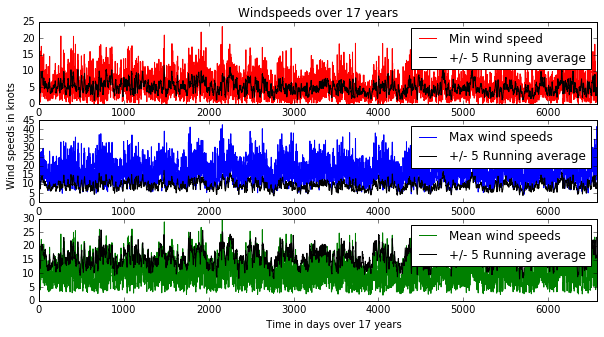

The period is approximately every 500 days 


In [193]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def make2dList(rows, cols):
    a=[]
    for row in range(rows): 
        a += [[0]*cols]
    return a

a = []
a = np.loadtxt("wind.data") #figure out structure loadtxt
data = a[:, 3:]
#ym =a[:, :2]
y = a[:, 0]
m =a[:, 1]
#year, month, mean wind speed, min wind speed, and max wind speed
mindaily = data.min(axis=1)
maxdaily = data.max(axis=1)
meandaily = data.mean(axis=1)

#net = make2dList(6574, 5)
#net.append(ym)
#numpy.eye(N, M=None, k=0, dtype=<type 'float'>)
#net = np.eye(6574, 5)

n= np.stack((y, m, meandaily, mindaily, maxdaily), axis = -1)

print n


def running_average(y, r):
    c = 1/(2.*r+1)
    ar1 = []
    for x in range(5 , 6569):
        yk = c*(np.sum(y[x-r:x+r]))
        ar1.append(yk)
    return ar1

%matplotlib inline
#makesure min,max, mean are arrays
plt.figure(figsize=[10,5])
#minarr = copy.copy(mindaily)
#np.asarray(minarr)
t = np.arange(0, 6574, 1)
av = running_average(mindaily, 5)
av2 = running_average(meandaily, 5)
av3 = running_average(maxdaily, 5)

plt.subplot(3,1,1)
plt.title("Windspeeds over 17 years")
plt.plot(t, mindaily, 'r', label = 'Min wind speed')
plt.plot(t[5:6569], av, color='black', label = '+/- 5 Running average')
plt.xlim([0, 6574])
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, maxdaily, 'b', label = 'Max wind speeds')
plt.plot(t[5:6569], av2, color='black',label = '+/- 5 Running average' )
#plt.plot(meandaily, color = 'green', label = 'Mean wind speeds')
#plt.plot(t[5:6569], av3, color='black')
plt.legend()
plt.xlabel('          Time in days over 17 years')
plt.ylabel("                 Wind speeds in knots")
plt.xlim([0, 6574])


plt.subplot(3,1,3)
plt.plot(meandaily, color = 'green', label = 'Mean wind speeds')
plt.plot(t[5:6569], av3, color='black', label ='+/- 5 Running average')
plt.legend()
plt.xlim([0, 6574])
plt.xlabel('          Time in days over 17 years')

plt.show()


print "The period is approximately every 500 days "

## Extra Credit Problem 4

This is an optional problem (*10 extra credit points*)

Bu now you must have heard about the gravitational wave event discovered by the <a href="https://en.wikipedia.org/wiki/LIGO">LIGO</a> collaboration in September 2014. LIGO has made their data <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">publically available</a>, and so you can run through their tutorial. Most of the tutorial has to do with signal processing, and we will address some of these topics later in the semester. For now, let's look at the I/O portion of the tutorial. 

1. Install h5py package: open Canopy, go to Canopy's Package Manager, Click on 'Available Packages', find h5py, and install it (the installer will also pull in hdf5 library and a few others). 

1. Download GW150915 iPython notebook and the associated data files from the link above. Do not forget to download readligo.py script

1. Read the data (4096 Hz sampling rate)

In [11]:
import h5py

# LIGO-specific readligo.py 
import readligo as rl

#----------------------------------------------------------------
# Load LIGO data from a single file
#----------------------------------------------------------------
# First from H1
fn_H1 = 'H-H1_LOSC_4_V1-1126259446-32.hdf5'
strain_H1, time_H1, chan_dict_H1 = rl.loaddata(fn_H1, 'H1')
# and then from L1
fn_L1 = 'L-L1_LOSC_4_V1-1126259446-32.hdf5'
strain_L1, time_L1, chan_dict_L1 = rl.loaddata(fn_L1, 'L1')

# both H1 and L1 will have the same time vector, so:
time = time_H1
# the time sample interval (uniformly sampled!)
dt = time[1] - time[0]
# sampling rate:
fs = 1/dt

For this problem:

1. Write a function to store the data from each LIGO detector in a CSV format. Your function should have the following syntax:<pre>def writeCSV(filename, header, time_array, strain_array)</pre>
Your data file should have a header, and the following columns: <pre>time, strain</pre>
1. Store H1 and L1 data into two separate files. Check that you can read the CSV file into a spreadsheet program (e.g. Excel)
1. Compare the size of the CSV file with the size of the hdf5 file containing the same data. Can you explain the difference ? 
1. Write a function to read the data from the CSV file. Your function should have the following syntax:<pre>def readCSV(filename)</pre> and it should return the two arrays: time and strain
1. Read H1 data from the CVS file, plot a histogram of the difference between the original array and the array read from the CVS file. 
1. Rewrite <pre>writeCSV()</pre> to only print out 4 significant digits for strain in the CSV file. Repeat steps 2 and 5. Can you your results ? 